In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


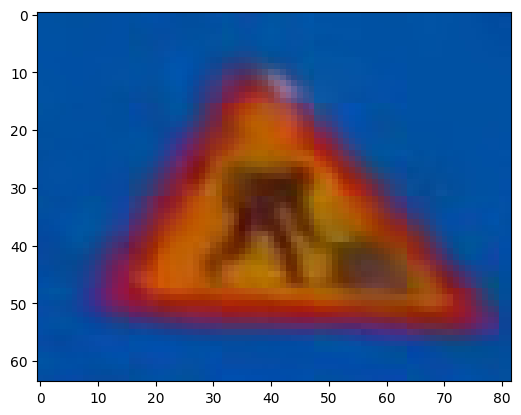

In [ ]:
img = image.load_img("/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data(2)/train/construction danger/0.jpg")
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data(2)/train/construction danger/0.jpg")

array([[[162,  81,   0],
        [162,  81,   0],
        [162,  81,   0],
        ...,
        [159,  75,   0],
        [157,  72,   0],
        [157,  72,   0]],

       [[162,  81,   0],
        [162,  81,   0],
        [162,  81,   0],
        ...,
        [159,  75,   0],
        [161,  76,   2],
        [161,  76,   2]],

       [[163,  81,   0],
        [163,  81,   0],
        [162,  81,   0],
        ...,
        [159,  75,   0],
        [162,  78,   2],
        [162,  78,   2]],

       ...,

       [[162,  82,   0],
        [162,  82,   0],
        [164,  80,   0],
        ...,
        [154,  77,   4],
        [156,  78,   2],
        [156,  78,   1]],

       [[161,  79,   2],
        [161,  79,   2],
        [164,  78,   2],
        ...,
        [156,  78,   2],
        [157,  79,   3],
        [157,  79,   3]],

       [[161,  78,   3],
        [160,  77,   2],
        [163,  76,   2],
        ...,
        [158,  77,   2],
        [157,  79,   3],
        [157,  79,   3]]

In [ ]:
train = ImageDataGenerator(rescale=1./255,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')
val = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = "/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data(2)/train"
val_dir = "/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data(2)/test"

In [ ]:
train_dataset = train.flow_from_directory(
    train_dir,
    target_size= (60,60),
    batch_size = 2,
    class_mode = "categorical"
)

val_dataset = train.flow_from_directory(
    val_dir,
    target_size= (60,60),
    batch_size = 2,
    class_mode = "categorical"
)

Found 242 images belonging to 24 classes.
Found 26 images belonging to 24 classes.


In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(60,60,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 128)       

In [ ]:
model.fit(train_dataset,epochs=150,validation_data=val_dataset)

Epoch 1/150
121/121 [==============================] - 6s 32ms/step - loss: 3.1775 - accuracy: 0.0331 - val_loss: 3.0317 - val_accuracy: 0.0769
Epoch 2/150
121/121 [==============================] - 4s 30ms/step - loss: 2.9993 - accuracy: 0.0744 - val_loss: 2.9177 - val_accuracy: 0.1538
Epoch 3/150
121/121 [==============================] - 5s 43ms/step - loss: 2.8233 - accuracy: 0.0785 - val_loss: 2.6431 - val_accuracy: 0.1923
Epoch 4/150
121/121 [==============================] - 4s 31ms/step - loss: 2.6855 - accuracy: 0.1033 - val_loss: 2.5491 - val_accuracy: 0.2308
Epoch 5/150
121/121 [==============================] - 5s 37ms/step - loss: 2.5680 - accuracy: 0.1446 - val_loss: 2.4164 - val_accuracy: 0.2308
Epoch 6/150
121/121 [==============================] - 4s 30ms/step - loss: 2.3914 - accuracy: 0.1901 - val_loss: 2.2709 - val_accuracy: 0.2692
Epoch 7/150
121/121 [==============================] - 4s 32ms/step - loss: 2.2297 - accuracy: 0.2231 - val_loss: 1.9845 - val_accuracy:

In [ ]:
train_dataset.class_indices

{'construction danger': 0,
 'direction': 1,
 'height limit': 2,
 'indication': 3,
 'intersection danger': 4,
 'no car entryturning': 5,
 'no more prohibition': 6,
 'no motorbike entryturning': 7,
 'no parking': 8,
 'no stopping and parking': 9,
 'no truck entryturning': 10,
 'no turn left': 11,
 'no turn right': 12,
 'no u and left turn': 13,
 'no u turn': 14,
 'one way prohibition': 15,
 'pedestrian crossing': 16,
 'pedestrian danger': 17,
 'road danger': 18,
 'slow warning': 19,
 'speed limit': 20,
 'vehicle and speed permission lane': 21,
 'vehicle permission lane': 22,
 'weight limit': 23}

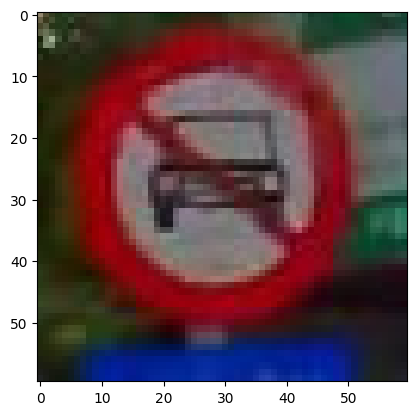

1/1 [==============================] - 0s 149ms/step
no u and left turn


In [ ]:
# Define a list of class names
class_names = ['construction danger',
 'direction',
 'height limit',
 'indication',
 'intersection danger',
 'no car entry/turning',
 'no more prohibition',
 'no motorbike entry/turning',
 'no parking',
 'no stopping and parking',
 'no truck entry/turning',
 'no turn left',
 'no turn right',
 'no u and left turn',
 'no u turn',
 'one way prohibition',
 'pedestrian crossing',
 'pedestrian danger',
 'road danger',
 'slow warning',
 'speed limit',
 'vehicle and speed permission lane',
 'vehicle permission lane',
 'weight limit']

# Define the model's prediction
tst_img_dir = "/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data/val_resized/56.jpg"
test_image = image.load_img(tst_img_dir, target_size=(60,60))
plt.imshow(test_image)
plt.show()
X = image.img_to_array(test_image)
X = np.expand_dims(X, axis=0)
test_img = np.vstack([X])
value = model.predict(test_img)

# Get the index of the predicted class
predicted_class_idx = np.argmax(value, axis=1)[0]

# Get the predicted class name
predicted_class_name = class_names[predicted_class_idx]

# Print the predicted class name
print(predicted_class_name)

In [ ]:
model.save('/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Code/saved_model/cnn_model')
#new_model = tf.keras.models.load_model('/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Code/saved_model/cnn_model')